In [1]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define base path
base_path = os.getcwd()

# load data
df_airports_geolocation = pd.read_csv(os.path.join (base_path, "data", "raw", "airports_geolocation.csv"))
df_cancelled_diverted = pd.read_csv(os.path.join (base_path, "data", "raw", "Cancelled_Diverted_2023.csv"))
df_flights = pd.read_csv(os.path.join (base_path, "data", "raw", "US_flights_2023.csv"))
df_meteo = pd.read_csv(os.path.join (base_path, "data", "raw", "weather_meteo_by_airport.csv"))


Flights dataframe

In [3]:
# print head
print (df_flights.head())

# check basic info
print(df_flights.info())

# check missing values
print(df_flights.isnull().sum())

# check unique values per column
print(df_flights.nunique())

# describe numeric columns
print(df_flights.describe())

   FlightDate  Day_Of_Week       Airline Tail_Number Dep_Airport  \
0  2023-01-02            1  Endeavor Air      N605LR         BDL   
1  2023-01-03            2  Endeavor Air      N605LR         BDL   
2  2023-01-04            3  Endeavor Air      N331PQ         BDL   
3  2023-01-05            4  Endeavor Air      N906XJ         BDL   
4  2023-01-06            5  Endeavor Air      N337PQ         BDL   

   Dep_CityName DepTime_label  Dep_Delay  Dep_Delay_Tag Dep_Delay_Type  ...  \
0  Hartford, CT       Morning         -3              0      Low <5min  ...   
1  Hartford, CT       Morning         -5              0      Low <5min  ...   
2  Hartford, CT       Morning         -5              0      Low <5min  ...   
3  Hartford, CT       Morning         -6              0      Low <5min  ...   
4  Hartford, CT       Morning         -1              0      Low <5min  ...   

  Flight_Duration       Distance_type  Delay_Carrier Delay_Weather  Delay_NAS  \
0              56  Short Haul >1500

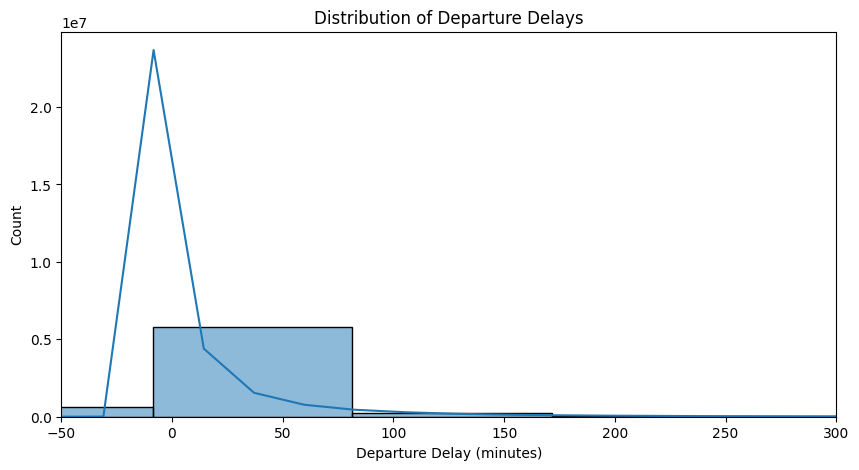

In [4]:
# distribution of departure delays
plt.figure(figsize=(10, 5))
sns.histplot(df_flights["Dep_Delay"], bins=50, kde=True)
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Count")
plt.xlim(-50, 300)
plt.show()

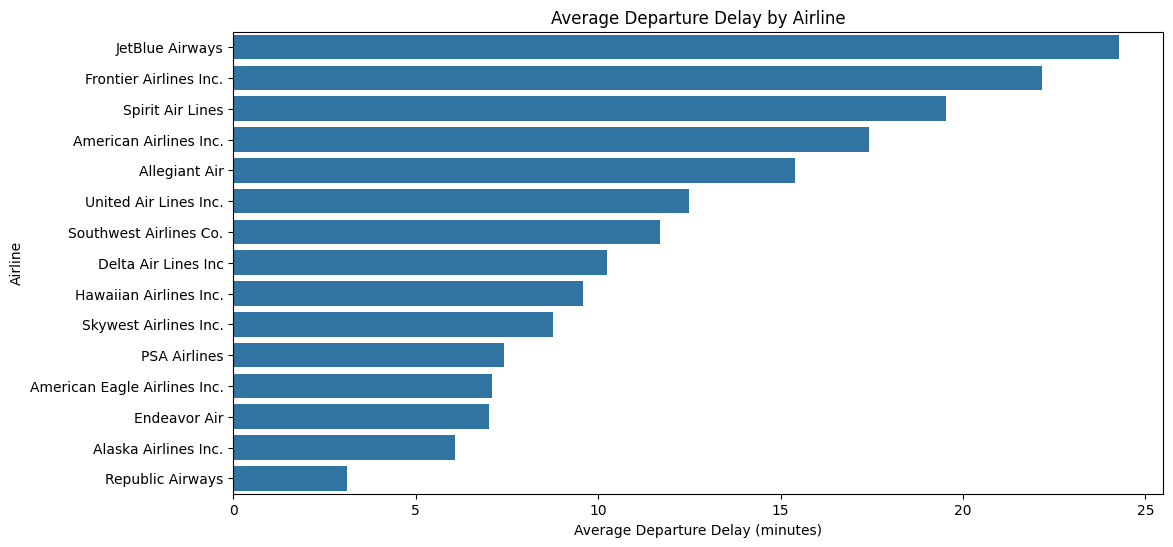

In [5]:
# average delay by airline
plt.figure(figsize=(12, 6))
airline_delay = df_flights.groupby("Airline")["Dep_Delay"].mean().sort_values(ascending=False)
sns.barplot(x=airline_delay, y=airline_delay.index)
plt.title("Average Departure Delay by Airline")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airline")
plt.show()

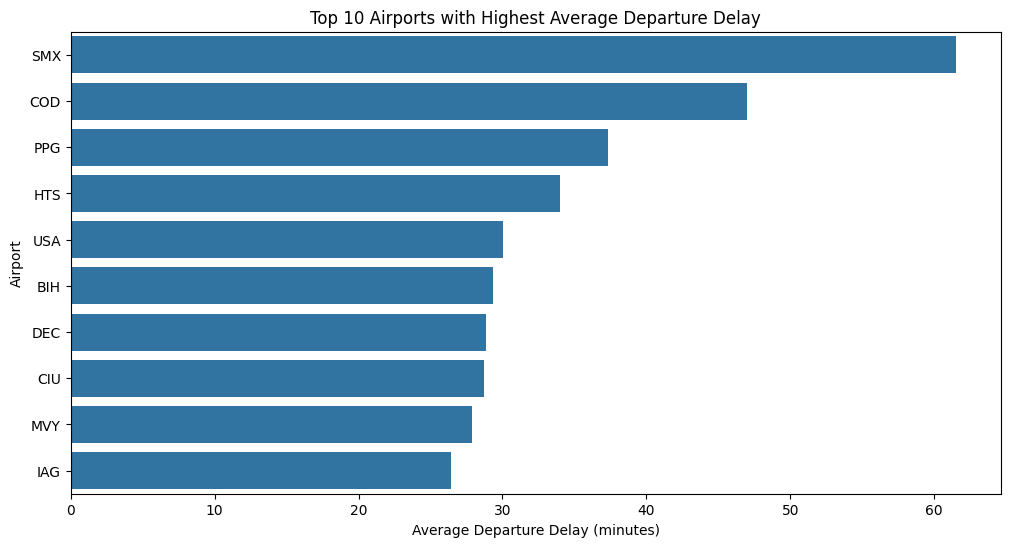

In [6]:
# top 10 airports with the highest average departure delay
plt.figure(figsize=(12, 6))
airport_delay = df_flights.groupby("Dep_Airport")["Dep_Delay"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=airport_delay, y=airport_delay.index)
plt.title("Top 10 Airports with Highest Average Departure Delay")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airport")
plt.show()

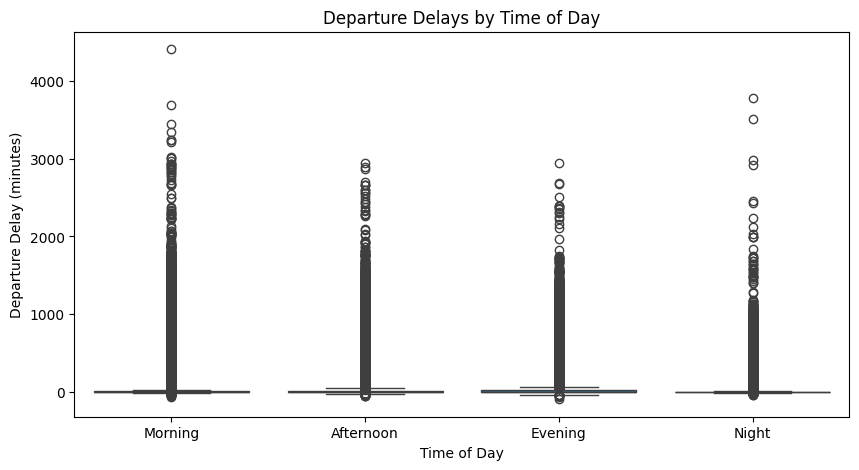

In [7]:
# delay distribution by time of day
plt.figure(figsize=(10, 5))
sns.boxplot(x="DepTime_label", y="Dep_Delay", data=df_flights)
plt.title("Departure Delays by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Departure Delay (minutes)")
plt.show()

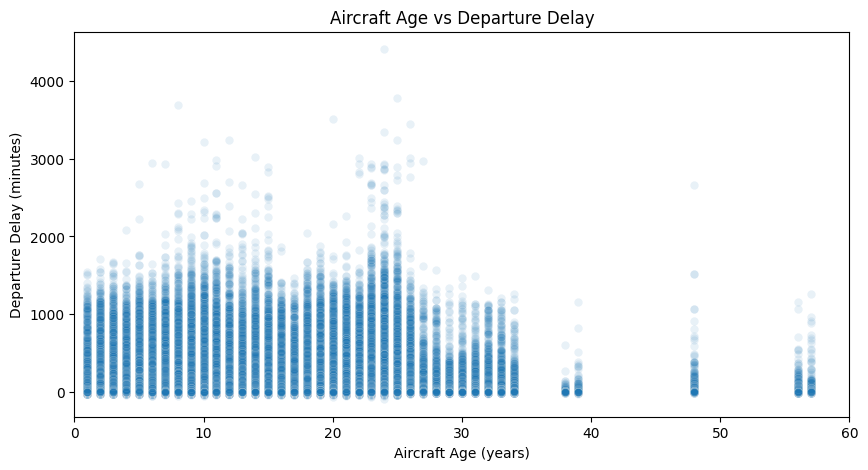

In [8]:
# aircraft age vs departure delay
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Aicraft_age", y="Dep_Delay", data=df_flights, alpha=0.1)
plt.title("Aircraft Age vs Departure Delay")
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Departure Delay (minutes)")
plt.xlim(0, 60)
plt.show()